<a href="https://colab.research.google.com/github/thesujitroy/NLP_transcript/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install ibm_watson

In [ ]:
import movie_editor as mp
clip = mp.VideoFileClip(r'filename.mp4') #path of input video file 
  
clip.audio.write_audiofile(r'filename.mp3') #path has to be given for audio file 

In [ ]:
from ibm_watson import SpeechToTextV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [ ]:
apikey = 'LEQ2x0i4Vn14YqXN4XmqmnzVck3IvYD7JLoCtDXXHFti'
url = 'https://api.eu-gb.speech-to-text.watson.cloud.ibm.com/instances/86999125-e10e-4abb-82e1-ac2853522e1c'

In [ ]:
authenticator = IAMAuthenticator(apikey)
stt = SpeechToTextV1(authenticator = authenticator)
stt.set_service_url(url)

In [ ]:
results = []
with open('C:/Users/hp/Downloads/audio/audio.mp3', 'rb') as f: # proper path has to given for the audio file
    res = stt.recognize(audio=f, content_type='audio/mp3', model='en-GB_NarrowbandModel', continuous=True,inactivity_timeout=360).get_result()
    results.append(res)

In [ ]:
text = []
for file in results:
    for result in file['results']:
        text.append(result['alternatives'][0]['transcript'].rstrip() + '.\n')

In [ ]:
with open('output.txt', 'w') as out: # writing text in a file
    out.writelines(text)

In [ ]:
pip install transformers

     |████████████████████████████████| 1.8MB 7.9MB/s 
     |████████████████████████████████| 2.9MB 38.4MB/s 
     |████████████████████████████████| 890kB 55.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=e9ac84c1043f61b3d1c5491be2712c4b8152513381efa7452b274a7c355dc872
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
pip install sentencepiece

     |████████████████████████████████| 1.2MB 8.7MB/s 


In [ ]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-emotion",use_fast = False)

model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-emotion")

/usr/local/lib/python3.6/dist-packages/transformers/models/auto/modeling_auto.py:925: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


In [ ]:
text = "Who is your father?"

In [ ]:

input_ids = tokenizer.encode(text+ '</s>', return_tensors='pt')

output = model.generate(input_ids=input_ids,
               max_length=2)

dec = [tokenizer.decode(ids) for ids in output]
label = dec[0]


/usr/local/lib/python3.6/dist-packages/transformers/models/t5/tokenization_t5.py:182: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  f"This sequence already has {self.eos_token}. In future versions this behavior may lead to duplicated eos tokens being added."


In [ ]:
label

'<pad> joy'

In [ ]:
pip install spacy

In [ ]:

nlp = English()

pipe = nlp.create_pipe('sentencizer')

nlp.add_pipe(pipe)

text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""


doc = nlp(text)

# create list of sentence tokens
sents_list = []
for sent in doc.sents:
    sents_list.append(sent.text)
print(sents_list)

NameError: ignored

In [ ]:
import numpy as np 
import pandas as pd 
import os
import librosa # to extract speech features
import wave # read and write WAV files
import matplotlib.pyplot as plt 

# MLP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# LSTM Classifier
import keras
from keras.utils import to_categorical,np_utils
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

In [ ]:
def extract_mfcc(wav_file_name):  
    #This function extracts mfcc features and obtain the mean of each dimension
    #Input : path_to_wav_file
    #Output: mfcc_features'''
    y, sr = librosa.load(wav_file_name,duration=3
                                  ,offset=0.5)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    
    return mfccs

In [ ]:
radvess_speech_labels = [] # to save extracted label/file
ravdess_speech_data = [] # to save extracted features/file
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Audio_emotion_dataset/'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        radvess_speech_labels.append(int(filename[7:8]) - 1) # the index 7 and 8 of the file name represent the emotion label
        wav_file_name = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name)) # extract MFCC features/file
        
print("Finish Loading the Dataset")

Finish Loading the Dataset


In [ ]:
ravdess_speech_data_array = np.asarray(ravdess_speech_data) # convert the input to an array
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape 

#### make categorical labels
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
labels_categorical = np_utils.to_categorical(lb.fit_transform(ravdess_speech_label_array))
labels_categorical.shape

(2880, 8)

In [ ]:
labels_categorical

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(np.array(ravdess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [ ]:
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.7)
validation_samples = int(number_of_samples * 0.2)
test_samples = int(number_of_samples * 0.1)

In [ ]:
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [ ]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [ ]:
w.shape

(2015, 40, 1)

In [ ]:
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples],
                      validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1),
                                       labels_categorical[training_samples:training_samples+validation_samples]), epochs=100, shuffle=True)

Epoch 1/100
63/63 [==============================] - 9s 16ms/step - loss: 2.0723 - accuracy: 0.1396 - val_loss: 2.0211 - val_accuracy: 0.2083
Epoch 2/100
63/63 [==============================] - 0s 6ms/step - loss: 2.0184 - accuracy: 0.1712 - val_loss: 1.9617 - val_accuracy: 0.2431
Epoch 3/100
63/63 [==============================] - 0s 6ms/step - loss: 1.9644 - accuracy: 0.2080 - val_loss: 1.9299 - val_accuracy: 0.2483
Epoch 4/100
63/63 [==============================] - 0s 6ms/step - loss: 1.9045 - accuracy: 0.2691 - val_loss: 1.8763 - val_accuracy: 0.3125
Epoch 5/100
63/63 [==============================] - 0s 6ms/step - loss: 1.8973 - accuracy: 0.2766 - val_loss: 1.8645 - val_accuracy: 0.3177
Epoch 6/100
63/63 [==============================] - 0s 5ms/step - loss: 1.8310 - accuracy: 0.3040 - val_loss: 1.8650 - val_accuracy: 0.2778
Epoch 7/100
63/63 [==============================] - 0s 6ms/step - loss: 1.8508 - accuracy: 0.2981 - val_loss: 1.8605 - val_accuracy: 0.2743
Epoch 8/100


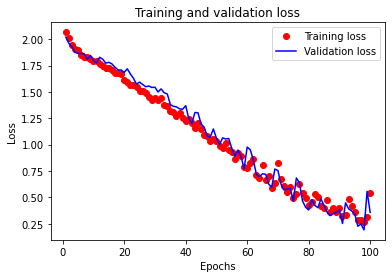

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

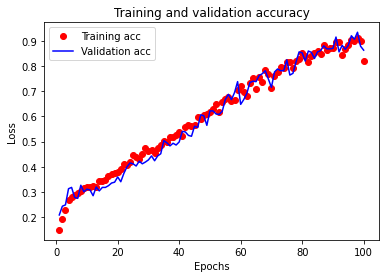

In [ ]:

plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), 
                 labels_categorical[training_samples + validation_samples:])

10/10 [==============================] - 0s 4ms/step - loss: 0.3784 - accuracy: 0.8616


[0.37843209505081177, 0.8615916967391968]

In [ ]:
pip install pydub

In [ ]:
from os import path
from pydub import AudioSegment

# files                                                                         
src = "/content/drive/MyDrive/preview.mp3"
dst = "test.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='test.wav'>

In [ ]:
path = '/content/test.wav'
import IPython.display as ipd
ipd.Audio(path)

In [ ]:
x = extract_mfcc(path)
x.shape

(40,)

In [ ]:
a = np.expand_dims(x,-1)
a.shape

(40, 1)

In [ ]:
y = np.expand_dims(a,axis = [0])
y.shape

(1, 40, 1)

In [ ]:
pred = model_A.predict(y)

In [ ]:
preds = pred.argmax(axis = 1)
preds

array([4])

In [ ]:
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))

In [ ]:
preds

array([4])

In [ ]:
my_dict = dict({0:'Neutral',1:'calm',2:'Happy',3:'Sad',4:'Angry',5:'Fearful',6:'Disgust',7:'Surprised'}) 

In [ ]:
my_dict.get(preds[0])

'Angry'

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
transfomed_label = encoder.fit_transform(['Neutral','Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised'])
print(transfomed_label)

[[0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]]


In [ ]:
data = encoder.inverse_transform(pred)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['Neutral','Calm','Happy','Sad','Angry','Fearful','Disgust','Surprised'])

LabelEncoder()

In [ ]:
le.classes_

array(['Angry', 'Calm', 'Disgust', 'Fearful', 'Happy', 'Neutral', 'Sad',
       'Surprised'], dtype='<U9')

In [ ]:
00 = neutral, 01 = calm, 02 = happy, 03 = sad, 04 = angry, 05 = fearful, 06 = disgust, 07 = surprised